## Helpers functions needed to work with Facebook endpoint

In [8]:
import requests, re, pandas as pd, numpy as np
from itertools import product
from bs4 import BeautifulSoup as bs

In [10]:
def request(method='GET', full_url='', resource='', q={}):
    """
    resource: Endpoint on FB Graph API
    q: Access Token, Parameters and Fields according to FB Graph API documentation for specified endpoint
    """
    response = None
    if method == 'GET':
        if full_url:
            response = requests.get(full_url)
        if resource:
            response = requests.get(f'https://graph.facebook.com/v13.0/{resource}/adimages', q)
        if response.status_code==400:
            print(f'Error Status Code 400 for URL: {response.url}')
            return response
    return response.json()


def read_endpoint(id_, endpoint, access_token, fields=[], params={}, n=10000):
    """
    read any endpoint for Facebook Graph API
    
    id_: identifier for any of Business, Account, Campaign, Ad Set, Ad, Creative, Ad Image, Ad Library
    endpoint: endpoint for any of the above according to Facebook Graph API
    access_token: required for usage of Facebook Graph API
    fields: fields to be read for the specified endpoint
    params: parameters to be passed for the specified endpoint
    n: number of desired results to be returned
    """
    q = dict({'access_token': access_token, 'fields': ','.join(fields)}, **params)
    if id_ == '':
        response = request(method='GET', resource=endpoint, q=q)
    else:
        response = request(method='GET', resource=f'{id_}/{endpoint}', q=q)
    if endpoint == '':
        return response
    
    data = []
    while True:
        try:
            data.extend(response['data'])
            if 'next' not in response['paging'].keys():
                break
            if len(data) >= n:
                break
            response = request(method='GET', full_url=response['paging']['next'])
        except Exception as e:
            break # not accessible
    return data

In [11]:
ACCESS_TOKEN = 'EAAEau61SMogBAKXf5ZCiYZC2WkmfCAkZCEz1cQoZBTgg4AdxRAAmG5ZAcH8hrSEsXPDZBPFodOdKr7s49i4ZBecZAZBnnV86z5HMCZAaYp1s2WoUj5P5PzYXTX6Gao2awkZBBudMZBubxwlG3UeRUZBCsBTb5GCeHbAsJFdf0Bal6Rpou4ORNt56cpVpK'

## Ad Library API endpoint documentation:
- Parameters: https://developers.facebook.com/docs/graph-api/reference/ads_archive/#parameters
- Fields: https://developers.facebook.com/docs/marketing-api/reference/archived-ad/#fields

In [3]:
# fields available to read as defined by documentation
FIELDS = ['id','ad_creation_time','ad_delivery_start_time','ad_delivery_stop_time',
          'ad_snapshot_url','ad_creative_bodies','ad_creative_link_captions','ad_creative_link_titles','ad_creative_link_descriptions',
          'languages',
          'page_id','page_name','bylines','currency','spend','impressions','estimated_audience_size','publisher_platforms',
          'demographic_distribution','delivery_by_region']

In [4]:
# parameters to use when reading the endpoint - as you can see 'search_terms' (related to what), 'media_type' (what kind of ads), 
# 'ad_reached_counties' (ads of where), etc

params = {'search_terms': '',
          'search_type': 'KEYWORD_UNORDERED',
          'media_type': 'IMAGE',
          'ad_active_status': 'ALL',
          'ad_reached_countries': ['US']}

In [5]:
def obtain_ads(search_term, country, fields, access_token):
    """
    a function to obtain ads from Ad Library based on given 'search_term' and 'country'
    """
    params = {'search_terms': search_term,
              'search_type': 'KEYWORD_UNORDERED',
              'media_type': 'IMAGE',
              'ad_active_status': 'ALL',
              'ad_reached_countries': [country]}
    
    ads = read_endpoint('', 'ads_archive', access_token, fields, params, 30000)
    
    for ad in ads: # add additional information
        ad['topic'] = search_term 
        ad['country'] = country
    return ads

### Example

Reference: https://www.siegemedia.com/seo/most-popular-keywords#:~:text=The%20winner%20of%20most%20popular,over%201%2C102%2C800%2C000%20searches%20per%20month.



In [9]:
# themes = ['ad-tech','ed-tech','agri-tech','fin-tech','bio-tech','health-tech','electric-vehicles','clean-energy',
#            'cloud-computing','quantum-computing','artificial-intelligence','machine-learning','digital-assets',
#            'virtual-reality','cyber-security','software','social-trends','analytics',
          
          
#           'youtube', 'facebook', 'whatsapp', 'google', 'gmail', 'amazon', 'translate', 'instagram', 'twitter', 'yahoo',
#           'ebay', 'outlook', 'walmart', 'pinterest', 'bbc-news',
          
#           'trump', 
          
#           'well-being', 'creator-culture', 'planet', 'tech-life', 'identity', 'everyday-wonder'
          
          
#          ]

In [6]:
# social media
# themes = ['youtube', 'facebook', 'whatsapp', 'google', 'gmail', 'amazon', 'translate', 'instagram', 'twitter', 'yahoo',
#           'ebay', 'outlook', 'walmart', 'pinterest', 'bbc-news', 'weather', 'google-map', 'news', 'paypal', 'linkedin'
#          ]



Ref: https://www.audacy.com/y98/blogs/kevin-the-intern-berghoff/the-top-trending-words-of-2020

In [ ]:
# themes = ['covid', 'face-mask', 'social-distancing', 'sustainability', 'quarantine', 'lockdown', 'zoom', 'symptoms', 'outbreak']

In [ ]:
# themes = ['social-media', 'bitcoin', 'energy', ]

In [12]:
from itertools import product
countries = ['US', 'GB', 'BR'] # all available countries for now
# themes = ['ad-tech','ed-tech','agri-tech','fin-tech','bio-tech','health-tech','electric-vehicles','clean-energy',
#           'cloud-computing','quantum-computing','artificial-intelligence','machine-learning','digital-assets',
#           'virtual-reality','cyber-security','software','social-trends','analytics']

themes = ['ad-tech']

all_ads = []
for ct in product(themes, countries):
    
    print(f'Retrieving Ads for: {ct}')
    ads = obtain_ads(ct[0], ct[1], FIELDS, ACCESS_TOKEN)
    print('\t', len(ads), 'ads')
    all_ads.extend(ads)
    
print(f'Retrieved {len(all_ads)} ads')

Retrieving Ads for: ('ad-tech', 'US')
Error Status Code 400 for URL: https://graph.facebook.com/v13.0/ads_archive/adimages?access_token=EAAEau61SMogBAKXf5ZCiYZC2WkmfCAkZCEz1cQoZBTgg4AdxRAAmG5ZAcH8hrSEsXPDZBPFodOdKr7s49i4ZBecZAZBnnV86z5HMCZAaYp1s2WoUj5P5PzYXTX6Gao2awkZBBudMZBubxwlG3UeRUZBCsBTb5GCeHbAsJFdf0Bal6Rpou4ORNt56cpVpK&fields=id%2Cad_creation_time%2Cad_delivery_start_time%2Cad_delivery_stop_time%2Cad_snapshot_url%2Cad_creative_bodies%2Cad_creative_link_captions%2Cad_creative_link_titles%2Cad_creative_link_descriptions%2Clanguages%2Cpage_id%2Cpage_name%2Cbylines%2Ccurrency%2Cspend%2Cimpressions%2Cestimated_audience_size%2Cpublisher_platforms%2Cdemographic_distribution%2Cdelivery_by_region&search_terms=ad-tech&search_type=KEYWORD_UNORDERED&media_type=IMAGE&ad_active_status=ALL&ad_reached_countries=US
	 0 ads
Retrieving Ads for: ('ad-tech', 'GB')
Error Status Code 400 for URL: https://graph.facebook.com/v13.0/ads_archive/adimages?access_token=EAAEau61SMogBAKXf5ZCiYZC2WkmfCAkZCEz1cQo

In [13]:
from facebookads.adobjects.adaccount import AdAccount

account = AdAccount('act_<AD_ACCOUNT_ID>')
images = account.get_ad_images()

SyntaxError: invalid syntax (adaccount.py, line 1582)

In [7]:
from itertools import product

countries = ['US'] # country the search the ads in
search_terms = ['Planned-Parenthood'] # search term for the relevant ads

all_ads = []
for ct in product(search_terms, countries):
    
    print(f'Retrieving Ads for: {ct}')
    ads = obtain_ads(ct[0], ct[1], FIELDS, ACCESS_TOKEN)
    all_ads.extend(ads)

print(f'Retrieved {len(all_ads)} ads')

Retrieving Ads for: ('Planned-Parenthood', 'US')
Retrieved 6866 ads


In [14]:
def get_image_url(ad_url):
    """
    function to extract image_url from the retreived data from Ad Library API ('/ads_archive' endpoint)
    Why?: the URL (ad_snapshot_url) obtained via the endpoint is not an image_url but instead a url for the entire ad
    """
    source = soup(requests.get(ad_url).content, 'html.parser')
    pattern = r'"resized_image_url":"(?:\\.|[^"\\])*"' # find resized_image_url : <image_url>
    try:
        image_url = re.findall(pattern, str(source))[0].split('"resized_image_url":')[1].replace('\\', '').replace('"', '').replace("'", '')
    except:
        image_url = np.nan
    return image_url

def process_ads(ads):
    """
    processes Ads retrieved from Ads Archive (FB Ad Library)
    """
    df = pd.DataFrame(ads)    
    clean = []
    for _, row in df.iterrows():
        m = {}
        m['search_term'] = row['topic']
        m['country'] = row['country']
        m['page_id'] = row['page_id']
        m['page_name'] = row['page_name']
        
        m['ad_id'] = row['id']
        
        m['ad_creation_date'] = row['ad_creation_time']
        if m['ad_creation_date'] is np.nan:
            continue
        m['ad_creation_month'] = int(m['ad_creation_date'][5:7])
        
        
        m['delivery_start'] = row['ad_delivery_start_time']
        if m['delivery_start'] is np.nan:
            continue
            
        m['delivery_stop'] = row['ad_delivery_stop_time']
        if m['delivery_stop'] is np.nan:
            continue
        
        start = datetime.strptime(m['delivery_start'], '%Y-%m-%d')
        stop = datetime.strptime(m['delivery_stop'], '%Y-%m-%d')
        m['delivery_period'] = (stop-start).days
        
        m['ad_url'] = row['ad_snapshot_url']
        
#         try:
#             source = soup(requests.get(row['ad_snapshot_url']).content, 'html.parser')
#             m['image_url'] = get_image_url(source)
#         except:
#             m['image_url'] = np.nan # some ads are wrongly classified as having images
        
        ad_body = row['ad_creative_bodies']
        m['ad_body'] = ad_body[0] if (type(ad_body) == list) else ''
        m['uses_multi_body'] = 1 if ((type(ad_body) == list) and (len(set(ad_body)) > 1)) else 0
        
        link_capt = row['ad_creative_link_captions']
        m['link_caption'] = link_capt[0] if (type(link_capt) == list) else ''
        m['uses_multi_capt'] = 1 if ((type(link_capt) == list) and (len(set(link_capt)) > 1)) else 0
        
        link_title = row['ad_creative_link_titles']
        m['link_title'] = link_title[0] if (type(link_title) == list) else ''
        m['uses_multi_title'] = 1 if ((type(link_title) == list) and (len(set(link_title)) > 1)) else 0
        
        link_desc = row['ad_creative_link_descriptions']
        m['link_description'] = link_desc[0] if (type(link_desc) == list) else ''
        m['uses_multi_desc'] = 1 if ((type(link_desc) == list) and (len(set(link_desc)) > 1)) else 0
        
        lang = row['languages']
        m['language'] = ','.join(lang) if (type(lang) == list) else ''
        m['uses_multi_lang'] = 1 if ((type(lang) == list) and (len(set(lang)) > 1)) else 0
        
        m['funded_by'] = row['bylines'] if type(row['bylines']) == str else ''
        m['currency'] = row['currency']
        
        spend = row['spend']
        m['min_spend'] = spend.get('lower_bound', np.nan)
        m['max_spend'] = spend.get('upper_bound', np.nan)
        
        impressions = row['impressions']
        m['min_impressions'] = impressions.get('lower_bound', np.nan)
        m['max_impressions'] = impressions.get('upper_bound', np.nan)
        
        audience_size = row['estimated_audience_size']
        m['min_audience_size'] = audience_size.get('lower_bound', np.nan) if type(audience_size)==dict else np.nan
        m['max_audience_size'] = audience_size.get('upper_bound', np.nan) if type(audience_size)==dict else np.nan
        
        
        if m['max_impressions'] is np.nan or m['min_impressions'] is np.nan: 
            m['impressions'] = 0
            continue
        else:
            m['impressions'] = (int(m['max_impressions']) + int(m['min_impressions']))/2
            
        if m['max_spend'] is np.nan or m['min_spend'] is np.nan: 
            m['spend'] = 0
            continue
        else:
            m['spend'] = (int(m['max_spend']) + int(m['min_spend']))/2
        
        
        if m['max_impressions'] is np.nan or m['max_impressions'] == 0:
            m['CPM'] = 0
            continue
        else:
            m['CPM'] = int(m['max_spend']) / int(m['max_impressions']) * 1000
        
        
        if m['max_impressions'] is np.nan or m['max_impressions'] == 0:
            m['CPM2'] = 0
            continue
        else:
            m['CPM2'] = int(m['spend']) / int(m['impressions']) * 1000
        
        
        
        platforms = row['publisher_platforms']
        m['facebook'] = 1 if ((type(platforms) == list) and ('facebook' in platforms)) else 0
        m['instagram'] = 1 if ((type(platforms) == list) and ('instagram' in platforms)) else 0
        m['messenger'] = 1 if ((type(platforms) == list) and ('messenger' in platforms)) else 0
        m['audience_network'] = 1 if ((type(platforms) == list) and ('audience_network' in platforms)) else 0
        
        m['demographic_dist'] = row['demographic_distribution']
        clean.append(m)
        
    return pd.DataFrame(clean)
from datetime import datetime
df = process_ads(all_ads)
pd.DataFrame(df['ad_id'].unique()).count()

KeyError: 'ad_id'

In [14]:
df.shape

(290271, 38)

In [21]:
#raw data
print("=============== ad example ==================")
all_ads[10]

=============== ad example ==================


{'id': '404703524487776',
 'ad_creation_time': '2021-10-22',
 'ad_delivery_start_time': '2021-10-25',
 'ad_delivery_stop_time': '2021-10-26',
 'ad_snapshot_url': 'https://www.facebook.com/ads/archive/render_ad/?id=404703524487776&access_token=EAAEau61SMogBAKXf5ZCiYZC2WkmfCAkZCEz1cQoZBTgg4AdxRAAmG5ZAcH8hrSEsXPDZBPFodOdKr7s49i4ZBecZAZBnnV86z5HMCZAaYp1s2WoUj5P5PzYXTX6Gao2awkZBBudMZBubxwlG3UeRUZBCsBTb5GCeHbAsJFdf0Bal6Rpou4ORNt56cpVpK',
 'ad_creative_bodies': ['Predictive analytics and data management have helped companies around the world meet their climate action targets. #ad'],
 'ad_creative_link_captions': ['FORTUNE.COM'],
 'ad_creative_link_titles': ['AVEVA is creating the sustainable tech of the future'],
 'ad_creative_link_descriptions': ['How companies can decrease emissions through intuitive software.'],
 'languages': ['en'],
 'page_id': '56501027948',
 'page_name': 'Fortune',
 'currency': 'USD',
 'spend': {'lower_bound': '0', 'upper_bound': '99'},
 'impressions': {'lower_bound': '

In [16]:
len(all_ads)

298031

In [15]:
import os
import pickle
from datetime import datetime
def ensure_folder_exists(folder_path):
    """
    Creates the specified folder if it does not already exist
    """
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)


def load_pickle(file_path):
    """
    Loads a pickle from the file system
    """
    return pickle.load(open(file_path, 'rb')) if os.path.isfile(file_path) else None


def save_pickle(file_path, data):
    """
    Saves the specified object as a pickle to the file system
    """
    with open(file_path, 'wb') as f:
        pickle.dump(data, f)

raw_dir = f'Y:/Internship/SoMin/Notebook/raw/{str(datetime.today().date()).replace("-","")}'

In [17]:
if not os.path.exists(raw_dir):
    os.makedirs(raw_dir)

# pickle.dumps(all_ads, f'{raw_dir}/adlibrary_ads.pkl')
save_pickle(f'{raw_dir}/adlibrary_ads.pkl', all_ads)

MemoryError: 

In [15]:
all_ads = load_pickle('Y:/Internship/SoMin/Notebook/raw/20220523/adlibrary_ads.pkl')

In [16]:
len(all_ads)

38985

In [27]:
def get_image_url(source):
    """
    function to extract image_url from the retreived data from Ad Library API
    Why?: the URL obtained via the endpoint is not an image_url but instead a url for a snapshot of the entire ad
    """
    pattern = r'"resized_image_url":"(?:\\.|[^"\\])*"' # find resized_image_url : <image_url>
    img_url = re.findall(pattern, str(source))[0].split('"resized_image_url":')[1].replace('\\', '').replace('"', '').replace("'", '')
    return img_url

def process_ads(ads):
    """
    processes Ads retrieved from Ads Archive (FB Ad Library)
    """
    df = pd.DataFrame(ads)
    clean = []
    for _, row in df.iterrows():
        m = {}
        m['search_term'] = row['topic']
        m['country'] = row['country']
        m['page_id'] = row['page_id']
        m['page_name'] = row['page_name']
        
        m['ad_id'] = row['id']
        m['ad_creation_date'] = row['ad_creation_time']
        m['delivery_start'] = row['ad_delivery_start_time']
        m['delivery_stop'] = row['ad_delivery_stop_time']
        m['ad_url'] = row['ad_snapshot_url']
        
#         try:
#             source = soup(requests.get(row['ad_snapshot_url']).content, 'html.parser')
#             m['image_url'] = get_image_url(source)
#         except:
#             m['image_url'] = np.nan # some ads are wrongly classified as having images
        
        ad_body = row['ad_creative_bodies']
        m['ad_body'] = ad_body[0] if (type(ad_body) == list) else ''
        m['uses_multi_body'] = 1 if ((type(ad_body) == list) and (len(set(ad_body)) > 1)) else 0
        
        link_capt = row['ad_creative_link_captions']
        m['link_caption'] = link_capt[0] if (type(link_capt) == list) else ''
        m['uses_multi_capt'] = 1 if ((type(link_capt) == list) and (len(set(link_capt)) > 1)) else 0
        
        link_title = row['ad_creative_link_titles']
        m['link_title'] = link_title[0] if (type(link_title) == list) else ''
        m['uses_multi_title'] = 1 if ((type(link_title) == list) and (len(set(link_title)) > 1)) else 0
        
        link_desc = row['ad_creative_link_descriptions']
        m['link_description'] = link_desc[0] if (type(link_desc) == list) else ''
        m['uses_multi_desc'] = 1 if ((type(link_desc) == list) and (len(set(link_desc)) > 1)) else 0
        
        lang = row['languages']
        m['language'] = ','.join(lang) if (type(lang) == list) else ''
        m['uses_multi_lang'] = 1 if ((type(lang) == list) and (len(set(lang)) > 1)) else 0
        
        m['funded_by'] = row['bylines'] if type(row['bylines']) == str else ''
        m['currency'] = row['currency']
        
        spend = row['spend']
        m['min_spend'] = spend.get('lower_bound', np.nan)
        m['max_spend'] = spend.get('upper_bound', np.nan)
        
        impressions = row['impressions']
        m['min_impressions'] = impressions.get('lower_bound', np.nan)
        m['max_impressions'] = impressions.get('upper_bound', np.nan)
        
        audience_size = row['estimated_audience_size']
        m['min_audience_size'] = audience_size.get('lower_bound', np.nan) if type(audience_size)==dict else np.nan
        m['max_audience_size'] = audience_size.get('upper_bound', np.nan) if type(audience_size)==dict else np.nan
        
        if m['max_impressions'] is np.nan or m['max_impressions'] == 0:
            m['CPM'] = 0
        else:
            m['CPM'] = int(m['max_spend']) / (int(m['max_impressions']) * 1000)
        
        platforms = row['publisher_platforms']
        m['facebook'] = 1 if ((type(platforms) == list) and ('facebook' in platforms)) else 0
        m['instagram'] = 1 if ((type(platforms) == list) and ('instagram' in platforms)) else 0
        m['messenger'] = 1 if ((type(platforms) == list) and ('messenger' in platforms)) else 0
        m['audience_network'] = 1 if ((type(platforms) == list) and ('audience_network' in platforms)) else 0
        
        m['demographic_dist'] = row['demographic_distribution']
        clean.append(m)
        
    return pd.DataFrame(clean)

In [28]:
df = process_ads(all_ads)

### Example of what the dataset would rougly look like

In [29]:
df

,search_term,country,page_id,page_name,ad_id,ad_creation_date,delivery_start,delivery_stop,ad_url,ad_body,...,min_impressions,max_impressions,min_audience_size,max_audience_size,CPM,facebook,instagram,messenger,audience_network,demographic_dist
0,ad-tech,US,100470349235347,Save Texas,762749274711708,2022-05-03,2022-05-03,2022-05-06,https://www.facebook.com/ads/archive/render_ad...,In a technical report updated for the first ti...,...,2000,2999,50001,100000,0.000033,1,0,0,0,"[{'percentage': '0.004551', 'age': '18-24', 'g..."
1,ad-tech,US,100470349235347,Save Texas,563054608471314,2022-05-03,2022-05-03,2022-05-06,https://www.facebook.com/ads/archive/render_ad...,In a technical report updated for the first ti...,...,0,999,100001,500000,0.000099,1,0,0,0,"[{'percentage': '0.003058', 'age': '45-54', 'g..."
2,ad-tech,US,430964644347524,Campaign Ad-Cloud,930566127614072,2022-05-03,2022-05-03,2022-05-08,https://www.facebook.com/ads/archive/render_ad...,Primaries happening NOW... but it's not too la...,...,1000,1999,1001,5000,0.000050,1,1,0,0,"[{'percentage': '0.001969', 'age': '25-34', 'g..."
3,ad-tech,US,143542762946146,Marcus Murphy,738864343939155,2022-04-07,2022-04-07,2022-04-22,https://www.facebook.com/ads/archive/render_ad...,Lawyer-Murphy’s FactWars.com reveals Criminal-...,...,1000,1999,10001,50000,0.000050,1,0,0,0,"[{'percentage': '0.000834', 'age': '45-54', 'g..."
4,ad-tech,US,108510735095059,Dr. Jennifer Wilson for City Council District 5,512240050437223,2022-04-07,2022-04-07,2022-04-25,https://www.facebook.com/ads/archive/render_ad...,The voters of District 5 deserve a representat...,...,10000,14999,1001,5000,0.000027,1,1,0,0,"[{'percentage': '0.000944', 'age': '25-34', 'g..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38980,analytics,BR,115255603631922,Ricardo Caminhoneiro 22310,600549173955885,2020-08-27,2020-08-27,2020-08-29,https://www.facebook.com/ads/archive/render_ad...,Analytics release series A financing launch pa...,...,2000,2999,1000001,NaN,0.000033,1,1,1,0,"[{'percentage': '0.046118', 'age': '35-44', 'g..."
38981,analytics,BR,197246230417092,Superweek - European Analytics Summit,1132843716910980,2019-06-11,2019-06-11,2019-06-19,https://www.facebook.com/ads/archive/render_ad...,🎥 [39:12] Digital Analytics Documentary 2019: ...,...,60000,69999,NaN,NaN,0.000004,1,0,0,0,"[{'percentage': '0.000264', 'age': '55-64', 'g..."
38982,analytics,BR,197246230417092,Superweek - European Analytics Summit,1409280549253390,2019-06-07,2019-06-09,2019-06-11,https://www.facebook.com/ads/archive/render_ad...,🎥 [39:12] Digital Analytics Documentary 2019: ...,...,0,999,NaN,NaN,0.000099,1,0,0,0,"[{'percentage': '0.395973', 'age': '25-34', 'g..."
38983,analytics,BR,197246230417092,Superweek - European Analytics Summit,2268489546735968,2019-06-07,2019-06-09,2019-06-12,https://www.facebook.com/ads/archive/render_ad...,🎥 [39:12] Digital Analytics Documentary 2019: ...,...,9000,9999,NaN,NaN,0.000010,1,0,0,0,"[{'percentage': '0.000219', 'age': '18-24', 'g..."


In [30]:
df.columns

Index(['search_term', 'country', 'page_id', 'page_name', 'ad_id',
       'ad_creation_date', 'delivery_start', 'delivery_stop', 'ad_url',
       'ad_body', 'uses_multi_body', 'link_caption', 'uses_multi_capt',
       'link_title', 'uses_multi_title', 'link_description', 'uses_multi_desc',
       'language', 'uses_multi_lang', 'funded_by', 'currency', 'min_spend',
       'max_spend', 'min_impressions', 'max_impressions', 'min_audience_size',
       'max_audience_size', 'CPM', 'facebook', 'instagram', 'messenger',
       'audience_network', 'demographic_dist'],
      dtype='object')

In [31]:
df.iloc[0]

search_term                                                    ad-tech
country                                                             US
page_id                                                100470349235347
page_name                                                   Save Texas
ad_id                                                  762749274711708
ad_creation_date                                            2022-05-03
delivery_start                                              2022-05-03
delivery_stop                                               2022-05-06
ad_url               https://www.facebook.com/ads/archive/render_ad...
ad_body              In a technical report updated for the first ti...
uses_multi_body                                                      0
link_caption                                     oceanservice.noaa.gov
uses_multi_capt                                                      0
link_title                        2022 Sea Level Rise Technical Report
uses_m

In [32]:
df['demographic_dist'][0]

[{'percentage': '0.004551', 'age': '18-24', 'gender': 'male'},
 {'percentage': '0.069966', 'age': '55-64', 'gender': 'male'},
 {'percentage': '0.000569', 'age': '18-24', 'gender': 'unknown'},
 {'percentage': '0.005688', 'age': '35-44', 'gender': 'unknown'},
 {'percentage': '0.064846', 'age': '25-34', 'gender': 'female'},
 {'percentage': '0.065984', 'age': '35-44', 'gender': 'male'},
 {'percentage': '0.241183', 'age': '65+', 'gender': 'female'},
 {'percentage': '0.079636', 'age': '65+', 'gender': 'male'},
 {'percentage': '0.143345', 'age': '55-64', 'gender': 'female'},
 {'percentage': '0.002275', 'age': '55-64', 'gender': 'unknown'},
 {'percentage': '0.062571', 'age': '45-54', 'gender': 'male'},
 {'percentage': '0.099545', 'age': '45-54', 'gender': 'female'},
 {'percentage': '0.081342', 'age': '35-44', 'gender': 'female'},
 {'percentage': '0.063709', 'age': '25-34', 'gender': 'male'},
 {'percentage': '0.007964', 'age': '65+', 'gender': 'unknown'},
 {'percentage': '0.002844', 'age': '25-

demographic_dist is a field that describe what is the percentage of user of different (age, gender) id

In [33]:
df['min_spend'].describe()

count     38985
unique       30
top           0
freq      32041
Name: min_spend, dtype: object

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38985 entries, 0 to 38984
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   search_term        38985 non-null  object 
 1   country            38985 non-null  object 
 2   page_id            38985 non-null  object 
 3   page_name          38982 non-null  object 
 4   ad_id              38985 non-null  object 
 5   ad_creation_date   38985 non-null  object 
 6   delivery_start     38985 non-null  object 
 7   delivery_stop      38928 non-null  object 
 8   ad_url             38985 non-null  object 
 9   ad_body            38985 non-null  object 
 10  uses_multi_body    38985 non-null  int64  
 11  link_caption       38985 non-null  object 
 12  uses_multi_capt    38985 non-null  int64  
 13  link_title         38985 non-null  object 
 14  uses_multi_title   38985 non-null  int64  
 15  link_description   38985 non-null  object 
 16  uses_multi_desc    389

In [35]:
sum(df['max_impressions'].isna())

55

In [36]:
df['min_spend']=df['min_spend'].astype('int64')
df['max_spend']=df['max_spend'].astype('int64')
df['max_impressions'].fillna(0, inplace=True)
df['min_impressions']=df['min_impressions'].astype('int64')
df['max_impressions']=df['max_impressions'].astype('int64')
# df['min_audience_size']=df['min_audience_size'].astype('int64')
# df['max_audience_size']=df['max_audience_size'].astype('int64')

In [37]:
df.describe()

,uses_multi_body,uses_multi_capt,uses_multi_title,uses_multi_desc,uses_multi_lang,min_spend,max_spend,min_impressions,max_impressions,CPM,facebook,instagram,messenger,audience_network
count,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000
mean,0.043273,0.005002,0.048968,0.026113,0.002052,113.158907,228.585738,11263.075542,12405.721944,0.000065,0.950648,0.479646,0.046095,0.043299
std,0.203474,0.070548,0.215803,0.159472,0.045254,824.450477,975.299759,56716.868731,49630.647297,0.000039,0.216605,0.499592,0.209693,0.203531
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,0.000000,999.000000,0.000025,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,0.000000,999.000000,0.000099,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,4000.000000,4999.000000,0.000099,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,90000.000000,99999.000000,1000000.000000,999999.000000,0.002001,1.000000,1.000000,1.000000,1.000000


In [71]:
N = len(all_ads)
for i in range(N):
    print(df.iloc[i]['max_spend'], df.iloc[i]['max_impressions'], df.iloc[i]['CPM'])

99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
399 14999 2.6601773451563438e-05
599 19999 2.9951497574878745e-05
99 2999 3.3011003667889295e-05
299 8999 3.322591399044338e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
99 5999 1.6502750458409736e-05
99 4999 1.9803960792158432e-05
199 8999 2.2113568174241583e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 2999 3.3011003667889295e-05
99 7999 1.2376547068383548e-05
99 6999 1.4144877839691385e-05
799 199999 3.995019975099875e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909

99 3999 2.4756189047261815e-05
299 19999 1.495074753737687e-05
99 7999 1.2376547068383548e-05
99 5999 1.6502750458409736e-05
99 1999 4.9524762381190596e-05
99 69999 1.4143059186559809e-06
99 44999 2.200048889975333e-06
99 1999 4.9524762381190596e-05
99 4999 1.9803960792158432e-05
99 2999 3.3011003667889295e-05
99 4999 1.9803960792158432e-05
99 4999 1.9803960792158432e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
199 19999 9.950497524876243e-06
99 6999 1.4144877839691385e-05
99 999 9.909909909909909e-05
199 14999 1.3267551170078004e-05
199 6999 2.8432633233319047e-05
99 999 9.909909909909909e-05
99 14999 6.600440029335289e-06
99 2999 3.3011003667889295e-05
1499 29999 4.996833227774259e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
199 34999 5.6858767393354094e-06
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 7999 1.2376547068383548e-05
299 999 0.0002992992992992993
99 5999 1.6

99 999 9.909909909909909e-05
99 19999 4.9502475123756185e-06
99 24999 3.960158406336253e-06
99 34999 2.828652247207063e-06
99 39999 2.4750618765469135e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 8999 1.1001222358039782e-05
199 44999 4.422320496011022e-06
199 99999 1.990019900199002e-06
99 8999 1.1001222358039782e-05
699 299999 2.3300077666925555e-06
99 14999 6.600440029335289e-06
99 1999 4.9524762381190596e-05
99 4999 1.9803960792158432e-05
99 24999 3.960158406336253e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
99 29999 3.300110003666789e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 59999 1.650027500458341e-06
1499 599999 2.498337497229162e-

99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 44999 2.200048889975333e-06
99 3999 2.4756189047261815e-05
99 249999 3.9600158400633605e-07
99 2999 3.3011003667889295e-05
1999 449999 4.442232093849098e-06
99 14999 6.600440029335289e-06
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 2999 3.3011003667889295e-05
199 19999 9.950497524876243e-06
99 14999 6.600440029335289e-06
99 8999 1.1001222358039782e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
299 99999 2.990029900299003e-06
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 14999 6.600440029335289e-06
99 7999 1.2376547068383548e-05
99 8999 1.1001222358039782e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
99 999 9.9099

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
199 9999 1.99019901990199e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
199 8999 2.2113568174241583e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 19999 9.950497524876243e-06
99 5999 1.6502750458409736e-05
99 3999 2.4756189047261815e-05
99 14999 6.600440029335289e-06
599 59999 9.983499724995416e-06
199 19999 9.950497524876243e-06
399 44999 8.866863708082402e-06
299 29999 9.966998899963332e-06


99 14999 6.600440029335289e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
2499 124999 1.99921599372795e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
299 24999 1.1960478419136766e-05
99 6999 1.4144877839691385e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 5999 1.6502750458409736e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 19999 4.9502475123756185e-06
99 999 9.909909909909909e-05
199 19999 9.950497524876243e-06
99 1999 4.9524762381190596e-05

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
299 8999 3.322591399044338e-05
299 7999 3.737967245905738e-05
99 999 9.909909909909909e-05
99 9

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
299 14999 1.9934662310820722e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 7999 1.2376547068383548e-05
99 5999 1.6502750458409736e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99

199 14999 1.3267551170078004e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
99 7999 1.2376547068383548e-05
99 5999 1.6502750458409736e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 4999 1.9803960792158432e-05
99 4999 1.9803960792158432e-05
99 4999 1.9803960792158432e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 5999 1.6

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
599 39999 1.4975374384359609e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
199 14999 1.3267551170078004e-05
99 999 9.909909909909909e-05
299 14999 1.9934662310820722e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 1999 4.9524762381190596e-05
499 34999 1.4257550215720449e-05
99 7999 1.2376547068383548e-05
99 2999 3.3011003667889295e-05
199 29999 6.63355445181506e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 999 9.90

499 44999 1.1089135314118092e-05
499 49999 9.98019960399208e-06
499 49999 9.98019960399208e-06
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 99

99 999 9.909909909909909e-05
99 9999 9.900990099009901e-06
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
499 34999 1.4257550215720449e-05
99 2999 3.3011003667889295e-05
199 14999 1.3267551170078004e-05
199 14999 1.3267551170078004e-05
899 89999 9.988999877776419e-06
899 59999 1.4983583059717663e-05
99 1999 4.9524762381190596e-05
399 4999 7.981596319263853e-05
499 7999 6.238279784973122e-05
499 9999 4.990499049904991e-05
699 14999 4.660310687379158e-05
599 14999 3.993599573304887e-05
599 9999 5.99059905990599e-05
499 14999 3.326888459230615e-05
199 2999 6.635545181727242e-05
599 7999 7.488436054506814e-05
499 7999 6.238279784973122e-05
599 8999 6.656295143904878e-05
599 14999 3.993599573304887e-05
499 19999 2.4951247562378118e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
399 9999 3.990399039903991e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
299 6999 4.272038862694671e-05
299 9999 2.9902990299029902e-05
499 14999 3.326888459230615e-05
99 

99 999 9.909909909909909e-05
3499 449999 7.775572834606299e-06
99 2999 3.3011003667889295e-05
199 6999 2.8432633233319047e-05
199 8999 2.2113568174241583e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
199 14999 1.3267551170078004e-05
199 7999 2.4878109763720467e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
399 19999 1.9950997549877493e-05
299 14999 1.9934662310820722e-05
299 14999 1.9934662310820722e-05
99 999 9.909909909909909e-05
199 5999 3.317219536589431e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
299 14999 1.9934662310820722e-05
1999 174999 1.1422922416699524e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 3999 2.4756189047261815e-05
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
599 199999 2.9950149750748755e-06
799 249999 3.1960127840511364e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
39

99 4999 1.9803960792158432e-05
99 4999 1.9803960792158432e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
199 14999 1.3267551170078004e-05
699 59999 1.1650194169902831e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
299 24999 1.1960478419136766e-05
99 999 9.909909909909909e-05
299 24999 1.1960478419136766e-05
399 24999 1.596063842553702e-05
699 49999 1.3980279605592111e-05
899 69999 1.2843040614865926e-05
799 59999 1.3316888614810247e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 34999 2.828652247207063e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
999 34999 2.854367267636218e-05
99 999 9.909909909909909e-05
99 4999 1.980396079215

99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
299 44999 6.644592102046712e-06
99 999 9.909909909909909e-05
199 59999 3.3167219453657563e-06
99 6999 1.4144877839691385e-05
199 19999 9.950497524876243e-06
99 4999 1.9803960792158432e-05
299 59999 4.9834163902731715e-06
99 3999 2.4756189047261815e-05
199 8999 2.2113568174241583e-05
99 3999 2.4756189047261815e-05
99 5999 1.6502750458409736e-05
99 4999 1.9803960792158

99 5999 1.6502750458409736e-05
99 24999 3.960158406336253e-06
99 14999 6.600440029335289e-06
99 14999 6.600440029335289e-06
99 6999 1.4144877839691385e-05
99 6999 1.4144877839691385e-05
99 19999 4.9502475123756185e-06
99 14999 6.600440029335289e-06
99 6999 1.4144877839691385e-05
99 24999 3.960158406336253e-06
99 3999 2.4756189047261815e-05
99 19999 4.9502475123756185e-06
99 6999 1.4144877839691385e-05
99 7999 1.2376547068383548e-05
99 19999 4.9502475123756185e-06
99 19999 4.9502475123756185e-06
99 14999 6.600440029335289e-06
99 6999 1.4144877839691385e-05
99 6999 1.4144877839691385e-05
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
99 8999 1.1001222358039782e-05
99 6999 1.4144877839691385e-05
299 34999 8.543101231463756e-06
399 79999 4.987562344529307e-06
99 14999 6.600440029335289e-06
99 5999 1.6502750458409736e-05
99 14999 6.600440029335289e-06
99 3999 2.4756189047261815e-05
99 5999 1.6502750458409736e-05
99 14999 6.600440029335289e-06
99 19999 4.9502475123756185e-06
9

699 34999 1.9971999199977142e-05
399 19999 1.9950997549877493e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 14999 1.3267551170078004e-05
199 5999 3.317219536589431e-05
99 999 9.909909909909909e-05
299 8999 3.322591399044338e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
299 14999 1.9934662310820722e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 14999 6.600440029335289e-06
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
499 24999 1.9960798431937277e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
3999 174999 2.285155915176658e-05
99 999 9.909909909909909e-05
99 19999 4.9502475123756185e-06
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
199 7999 2.4878109763720467e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
299 14999 1.9934662310820722e-05
99 999 9.90990990

99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
199 9999 1.99019901990199e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 7999 2.4878109763720467e-05
599 124999 4.7920383363066905e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 14999 1.3267551170078004e-05
599 39999 1.4975374384359609e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 7999 1.2376547068383548e-05
199 4999 3.980796159231847e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
299 39999 7.4751868796719914e-06
99 999 9.909909909909909e-05
199 999 0.0001991991991991992
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 

699 174999 3.994308538905937e-06
899 199999 4.4950224751123755e-06
99 999 9.909909909909909e-05
399 14999 2.6601773451563438e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
299 8999 3.322591399044338e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
599 69999 8.557265103787197e-06
99 4999 1.9803960792158432e-05
99 1999 4.9524762381190596e-05
299 19999 1.495074753737687e-05
1499 124999 1.1992095936767494e-05
199 69999 2.842897755682224e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-

99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 4999 1.9803960792158432e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
2499 174999 1.4280081600466288e-05
99 2999 3.3011003667889295e-05
99 5999 1.6502750458409736e-05
99 6999 1.4144877839691385e-05
99 6999 1.4144877839691385e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 24999 7.960318412736509e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
899 59999 1.4983583059717663e-05
299 7999 3.737967245905738e-05
99 999 9.909909909909909e-05
299 24999 1.1960478419136766e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-0

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
5999 299999 1.9996733322444408e-05
199 19999 9.950497524876243e-06
99 999 9.909909909909909e-05
2499 249999 9.996039984159937e-06
2499 249999 9.996039984159937e-06
599 59999 9.983499724995416e-06
299 14999 1.9934662310820722e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
1499 39999 3.747593689842246e-05
199 3999 4.976244061015254e-05
5999 599999 9.998349997249995e-06
99 6999 1.4144877839691385e-05
2999 299999 9.996699988999963e-06
999 39999 2.4975624390609766e-05
1999 149999 1.3326755511703411e-05
99 999 9.909909909909909e-05
199 2999 6.635545181727242e-05
199 2999 6.635545181727242e-05
199 2999 6.635545181727242e-05
199 2999 6.635545181727242e-05
99 1999 4.9524762381190596e-05
199 2999 6.635545181727242e-05
199 2999 6.635545181727242e-05
199 1999 9.954977488744373e-05
199 1999 9.95497748874437

99 1999 4.9524762381190596e-05
399 24999 1.596063842553702e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
299 69999 4.271489592708467e-06
199 7999 2.4878109763720467e-05
199 14999 1.3267551170078004e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
599 34999 1.7114774707848795e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
1499 124999 1.1992095936767494e-05
1499 149999 9.993399955999706e-06
1499 174999 8.56576323293276e-06
99 4999 1.9803960792158432e-05
99 29999 3.300110003666789e-06
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 14999 6.600440029335289e-06
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 2999 3.30

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
399 19999 1.99509975498

99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
499 39999 1.247531188279707e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
199 9999 1.99019901990199e-05
399 34999 1.1400325723592103e-05
499 39999 1.247531188279707e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 9999 1.99019901990199e-05
199 19999 9.950497524876243e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
299 19999 1.495074753737687e-05
499 19999 2.4951247562378118e-05
399 7999 4.98812351543943e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
1499 124999 1.1992095936767494e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
299 24999 1.196047841913676

299 34999 8.543101231463756e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 14999 6.600440029335289e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 19999 4.9502475123756185e-06
299 29999 9.966998899963332e-06
1499 149999 9.993399955999706e-06
2999 299999 9.996699988999963e-06
599 59999 9.983499724995416e-06
199 14999 1.3267551170078004e-05
9999 799999 1.249876562345703e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 6999 1.4144877839691385e-05
199 3999 4.976244061015254e-05
499 7999 6.238279784973122e-05
5999 124999 4.799238393907151e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
1499 24999 5.996239849593984e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 34999 5.6858767393354094e-06
99 999 9

599 19999 2.9951497574878745e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
199 29999 6.63355445181506e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
899 89999 9.988999877776419e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 9999 1.99019901990199e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
199 8999 2.2113568174241583e-05
99 29999 3.300110003666789e-06
99 1999 4.9524762381190596e-05
99 999 9.9

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
1999 79999 2.4987812347654347e-05
99 999 9.909909909909909e-05
399 19999 1.9950997549877493e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 14999 6.600440029335289e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.90990990990

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 19999 4.9502475123756185e-06
199 24999 7.960318412736509e-06
99 14999 6.600440029335289e-06
99 7999 1.2376547068383548e-05
199 24999 7.960318412736509e-06
199 19999 9.950497524876243e-06
99 9999 9.900990099009901e-06
99 19999 4.9502475123756185e-06
99 3999 2.4756189047261815e-05
199 19999 9.950497524876243e-06
99 14999 6.600440029335289e-06
99 9999 9.900990099009901e-06
99 9999 9.900990099009901e-06
199 24999 7.960318412736509e-06
99 4999 1.9803960792158432e-05
199 249

99 1999 4.9524762381190596e-05
799 349999 2.282863665324758e-06
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
199 6999 2.8432633233319047e-05
199 6999 2.8432633233319047e-05
199 3999 4.976244061015254e-05
199 3999 4.976244061015254e-05
199 7999 2.4878109763720467e-05
199 5999 3.317219536589431e-05
199 5999 3.317219536589431e-05
199 6999 2.8432633233319047e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
2999 149999 1.999346662311082e-05
399 49999 7.980159603192063e-06
99 8999 1.1001222358039782e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
399 44999 8.866863708082402e-06
99 1999 4.9524762381190596e-05
99 19999 4.9502475123756185e-06
99 1999 4.9524762381190596e-05
99 19999 4.9502475123756185e-06
199 3999 4.976244061015254e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
699 44999 1.553367852618947e-05
99 999 9

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
199 14999 1.3267551170078004e-05
99 3999 2.4756189047261815e-05
99 4999 1.9803960792158432e-05
199 24999 7.960318412736509e-06
99 5999 1.6502750458409736e-05
99 14999 6.600440029335289e-06
99 8999 1.1001222358039782e-05
99 7999 1.2376547068383548e-05
399 59999 6.650110835180586e-06
499 59999 8.316805280088002e-06
99 14999 6.600440029335289e-06
99 14999 6.600440029335289e-06
199 14999 1.3267551170078004e-05
299 19999 1.495074753737687e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
9

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 7999 1.2376547068383548e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
399 89999 4.4333825931399235e-06
99 2999 3.3011003667889295e-05
199 14999 1.3267551170078004e-05
199 6999 2.8432633233319047e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.90990990990

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 14999 1.3267551170078004e-05
99 999 9.909909909909909e-05
499 19999 2.4951247562378118e-05
199 3999 4.976244061015254e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 34999 5.6858767393354094e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
299 29999 9.966998899963332e-06
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.9099099

99 2999 3.3011003667889295e-05
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-0

1499 149999 9.993399955999706e-06
3499 299999 1.1663372211240704e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 6999 1.4144877839691385e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
2499 69999 3.570051000728582e-05
1499 24999 5.996239849593984e-05
1499 24999 5.996239849593984e-05
99 8999 1.1001222358039782e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
599 19999 2.9951497574878745e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 19999 9.950497524876243e-06
99 7999 1.2376547068383548e-05
99 14999 6.600440029335289e-06
99 1999 4.9524762381190596e-05
199 9999 1.99019901990199e-05
99 4999 1.9803960792158432e-05
99 7999 1.2376547068383548e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909

99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
299 14999 1.9934662310820722e-05
699 29999 2.3300776692556418e-05
899 39999 2.2475561889047227e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
1499 99999 1.4990149901499015e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 59999 1.650027500458341e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
199 14999 1.3267551170078004e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
199 44999 4.422320496011022e-06
99 5999 1.6502750458409736e-05
399 49999 7.980159603192063e-06
99 999 9.909909909909909e-05
199 19999 9.950497524876243e-06
99 19999 4.95024751237

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
499 59999 8.316805280088002e-06
99 999 9.909909909909909e-05
199 14999 1.3267551170078004e-05
999 44999 2.220049334429654e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
299 8999 3.322591399044338e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 14999 1.3267551170078004e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
399 14999 2.6601773451563438e-05
399 14999 2.6601773451563438e-05
399 29999 1.3300443348111603e-05
399 29999 1.3300443348111603e-

99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
199 24999 7.960318412736509e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
299 14999 1.9934662310820722e-05
299 14999 1.9934662310820722e-05
199 14999 1.3267551170078004e-05
99 79999 1.2375154689433618e-06
99 5999 1.6502750458409736e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
199 6999 2.8432633233319047e-05
599 14999 3.993599573304887e-05
199 3999 4.976244061015254e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
199 2999 6.635545181

99 1999 4.9524762381190596e-05
699 59999 1.1650194169902831e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
299 14999 1.9934662310820722e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
199 14999 1.3267551170078004e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
5999 799999 7.498759373449217e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
599 69999 8.557265103787197e-06
199 19999 9.950497524876243e-06
99 7999 1.2376547068383548e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 29999 6.63355445181506e-06
99 7999 1.2376547068383548e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
399 24999 1.596063842553702e-05
99 7999 1.2376547068383548e-

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
399 59999 6.650110835180586e-06
199 14999 1.3267551170078004e-05
99 3999 2.4756189047261815e-05
1499 174999 8.56576323293276e-06
99 3999 2.4756189047261815e-05
199 14999 1.3267551170078004e-05
1499 149999 9.993399955999706e-06
199 19999 9.950497524876243e-06
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
199 14999 1.3267551170078004e-05
99 1999 4.9524762381190596e-05
199 14999 1.3267551170078004e-05
399 49999 7.980159603192063e-06
99 5999 1.6502750458409736e-05
299 34999 8.543101231463756e-06
199 14999 1.3267551170078004e-05
1499 124999 1.1992095936767494e-05
99 999 9.909909909909909e-05
199 19999 9.950497524876243e-06
99 299

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05


99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
299 1999 0.00014957478739369685
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
299 4999 5.9811962392478495e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
299 2999 9.969989996665556e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9

99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
399 39999 9.975249381234532e-06
99 1999 4.9524762381190596e-05
199 3999 4.976244061015254e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
9

1499 99999 1.4990149901499015e-05
1499 124999 1.1992095936767494e-05
399 24999 1.596063842553702e-05
2499 124999 1.99921599372795e-05
399 24999 1.596063842553702e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
299 29999 9.966998899963332e-06
99 2999 3.3011003667889295e-05
1499 79999 1.873773422167777e-05
199 19999 9.950497524876243e-06
99 8999 1.1001222358039782e-05
299 29999 9.966998899963332e-06
99 14999 6.600440029335289e-06
199 24999 7.960318412736509e-06
799 29999 2.663422114070469e-05
599 29999 1.9967332244408147e-05
799 49999 1.598031960639213e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 7999 1.2376547068383548e-05
199 19999 9.950497524876243e-06
199 19999 9.950497524876243e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 14999 1.3267551170078004e-05
299 34999 8.543101231463756e-06
99 999 9.909909909909909e-05


99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 6999 1.4144877839691385e-05
499 44999 1.1089135314118092e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 7999 1.2376547068383548e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
499 89999 5.544506050067223e-06
199 9999 1.99019901990199e-05
1999 89999 2.221135790397671e-05
1999 174999 1.1422922416699524e-05
1999 174999 1.1422922416699524e-05
1499 89999 1.6655740619340215e-05
299 14999 1.9934662310820722e-05
799 59999 1.3316888614810247e-05
1499 59999 2.4983749729162153e-05
99 4999 1.9803960792158432e-05
99 1999 4.9524762381190596e-05
99 19999 4.9502475123756185e-06
99 999 9.909909909909909e-05

399 39999 9.975249381234532e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 999 9.9099099099099

499 59999 8.316805280088002e-06
99 999 9.909909909909909e-05
199 24999 7.960318412736509e-06
99 8999 1.1001222358039782e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 4999 1.9803960792158432e-05
699 399999 1.7475043687609218e-06
199 39999 4.975124378109453e-06
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
199 19999 9.950497524876243e-06
99 2999 3.3011003667889295e-05
99 3999 2.4756189047261815e-05
99 3999 2.4756189047261815e-05
99 4999 1.9803960792158432e-05
99 4999 1.9803960792158432e-05
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 29999 6.63355445181506e-06
99 4999 1.9803960792158432e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 24999 3.960158406336253e-06
99 999 9.909909909909

99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
199 19999 9.950497524876243e-06
1499 199999 7.495037475187376e-06
99 5999 1.6502750458409736e-05
199 14999 1.3267551170078004e-05
1499 99999 1.4990149901499015e-05
599 59999 9.983499724995416e-06
99 4999 1.9803960792158432e-05
99 8999 1.1001222358039782e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 6999 1.4144877839691385e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 14999 6.600440029335289e-06
199 24999 7.960318412736509e-06
99 19999 4.9502475123756185e-06
499 69999 7.1286732667609535e-06
199 24999 7.960318412736509e-06
299 34999 8.543101231463756e-06
99 3999 2.4756189047261815e-05
99 8999 1.1001222358039782e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 14999 6.600440029335289e-06
99 14999 6.600440029335289e-06
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05


99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 8999 1.1001222358039782e-05
99 2999 3.3011003667889295e-05
99 7999 1.2376547068383548e-05
99 9999 9.900990099009901e-06
99 4999 1.9803960792158432e-05
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
99 24999 3.960158406336253e-06
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
199 19999 9.950497524876243e-06
99 2999 3.3011003667889295e-05
99 6999 1.4144877839691385e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
299 34999 8.543101231463756e-06
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-0

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
199 8999 2.2113568174241583e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
3499 124999 2.79922239

99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 9999 1.99019901990199e-05
99 999 9.909909909909909e-05
99 6999 1.4144877839691385e-05
99 4999 1.9803960792158432e-05
99 6999 1.4144877839691385e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 999 9.9099099

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 6999 1.4144877839691385e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 14999 6.600440029335289e-06
99 14999 6.600440029335289e-06
99 999 9.909909909909909e-05
299 19999 1.495074753737687e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
799 124999 6.3920511364090915e-06
199 4999 3.980796159231847e-05
99 3999 2.4756189047261815e-05
499 24999 1.9960798431937277e-05
899 44999 1.997822173826085e-05
1999 99999 1.999019990199902e-05
899 39999 2.2475561889047227e-05
99 999 9.909909909909909e-05
1499 69999 2.1414591637023385e-05
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
399 89999 4.433382593139

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
599 69999 8.557265103787197e-06
99 4999 1.9803960792158432e-05
599 49999 1.1980239604792096e-05
599 44999 1.331140692015378e-05
99 8999 1.1001222358039782e-05
99 5999 1.6502750458409736e-05
99 5999 1.6502750458409736e-05
99 5999 1.6502750458409736e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 9999 1.99019901990199e-05
99 5999 1.6502750458409736e-05
199 14999 1.3267551170078004e-05
99 999 9.909909909909909e-05
4499 299999 1.4996716655722186e-05
299 14999 1.9934662310820722e-05
399 34999 1.1400325723592103e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.9099099099

199 19999 9.950497524876243e-06
199 19999 9.950497524876243e-06
1999 149999 1.3326755511703411e-05
499 44999 1.1089135314118092e-05
399 29999 1.3300443348111603e-05
499 29999 1.6633887796259876e-05
99 1999 4.9524762381190596e-05
199 14999 1.3267551170078004e-05
899 399999 2.247505618764047e-06
99 4999 1.9803960792158432e-05
199 5999 3.317219536589431e-05
199 8999 2.2113568174241583e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
99 3999 2.4756189047261815e-05
1999 79999 2.4987812347654347e-05
199 5999 3.317219536589431e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
299 29999 9.966998899963332e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 6999 1.4144877839691385e-05
199 14999 1.3267551170078004e-05
299 19999 1.495074753737687e-05
299 14999 1.9934662310820722e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
199 19999 9.950497524876243e-06
3499 124999 2.7992223937791503e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 4999 1.98039

299 24999 1.1960478419136766e-05
199 14999 1.3267551170078004e-05
499 29999 1.6633887796259876e-05
299 19999 1.495074753737687e-05
199 14999 1.3267551170078004e-05
199 14999 1.3267551170078004e-05
199 9999 1.99019901990199e-05
199 14999 1.3267551170078004e-05
699 19999 3.495174758737937e-05
99 1999 4.9524762381190596e-05
99 14999 6.600440029335289e-06
99 3999 2.4756189047261815e-05
199 7999 2.4878109763720467e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
199 9999 1.99019901990199e-05
99 999 9.909909909909909e-05
199 14999 1.3267551170078004e-05
399 24999 1.596063842553702e-05
699 29999 2.3300776692556418e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
499 24999 1.9960798431937277e-05
499 19999 2.4951247562378118e-05
299 14999 1.9934662310820722e-05
299 24999 1.1960478419136766e-05
299 19999 1.495074753737687e-05
299 29999 9.966998899963332e-06
199 14999 1.3267551170078004e-05
199 4999 3.980796159231847e-05
99 999 9.909909909909909e-05
99 2999 3.3011003

99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
199 14999 1.3267551170078004e-05
799 59999 1.3316888614810247e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
199 14999 1.3267551170078004e-05
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
199 14999 1.3267551170078004e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 14999 6.600440029335289e-06
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
499 44999 1.1089135314118092e-05
99 999 9.909909909909909e-05
399 24999 1.59

199 5999 3.317219536589431e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
599 59999 9.983499724995416e-06
599 69999 8.557265103787197e-06
99 999 9.909909909909909e-05
2499 199999 1.2495062475312377e-05
299 24999 1.1960478419136766e-05
99 5999 1.6502750458409736e-05
99 7999 1.2376547068383548e-05
99 999 9.909909909909909e-05
99 9999 9.900990099009901e-06
299 34999 8.543101231463756e-06
199 24999 7.960318412736509e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
199 19999 9.950497524876243e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 2999 3.301100366788

199 14999 1.3267551170078004e-05
99 1999 4.9524762381190596e-05
499 49999 9.98019960399208e-06
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
199 3999 4.976244061015254e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 14999 6.600440029335289e-06
99 5999 1.6502750458409736e-05
99 1999 4.9524762381190596e-05
199 19999 9.950497524876243e-06
199 14999 1.3267551170078004e-05
99 1999 4.9524762381190596e-05
99 4999 1.9803960792158432e-05
99 6999 1.4144877839691385e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 3999 2.4756189047261815e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.90990990990990

99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4

99 2999 3.3011003667889295e-05
99 9999 9.900990099009901e-06
1499 249999 5.996023984095936e-06
199 19999 9.950497524876243e-06
199 19999 9.950497524876243e-06
199 14999 1.3267551170078004e-05
499 59999 8.316805280088002e-06
99 3999 2.4756189047261815e-05
2499 89999 2.7766975188613206e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
299 14999 1.9934662310820722e-05
99 3999 2.4756189047261815e-05
399 29999 1.3300443348111603e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
199 4999 3.980796159231847e-05
99 999 9.909909909909909e-05
9

299 34999 8.543101231463756e-06
99 5999 1.6502750458409736e-05
99 4999 1.9803960792158432e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 6999 1.4144877839691385e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 4999 1.9803960792158432e-05
99 3999 2.4756189047261815e-05
99 4999 1.9803960792158432e-05
99 3999 2.4756189047261815e-05
399 69999 5.700081429734711e-06
99 2999 3.3011003667889295e-05
99 3999 2.4756189047261815e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 4999 1.9803960792158432e-05
99 7999 1.2376547068383548e-05
399 59999 6.650110835180586e-06
399 69999 5.700081429734711e-06
99 2999 3.3011003667889295e-05
99 7999 1.2376547068383548e-05
399 79999 4.987562344529307e-06
99 5999 1.6502750458409736e-05
99 4999 1.9803960792158432e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
299 59999 4.9834163902731715e-06
399

99 1999 4.9524762381190596e-05
399 19999 1.9950997549877493e-05
99 6999 1.4144877839691385e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
199 4999 3.980796159231847e-05
299 14999 1.9934662310820722e-05
99 5999 1.6502750458409736e-05
99 3999 2.4756189047261815e-05
199 4999 3.980796159231847e-05
399 14999 2.6601773451563438e-05
299 14999 1.9934662310820722e-05
99 3999 2.4756189047261815e-05
199 6999 2.8432633233319047e-05
399 14999 2.6601773451563438e-05
99 999 9.909909909909909e-05
99 6999 1.4144877839691385e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
299 24999 1.1960478419136766e-05
199 44999 4.422320496011022e-06
99 3999 2.4756189047261815e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
199 4999 3.980796159231847e-05
499 19999 2.4951247562378118e-05
2499 149999 1.6660111067407116e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.

99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 7999 1.2376547068383548e-05
99 999 9.909909909909909e-05
99 14999 6.600440029335289e-06
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
399 24999 1.596063842553702e-05
299 19999 1.495074753737687e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 8999 1.1001222358039782e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
499 14999 3.326888459230615e-05
499 14999 3.326888459230615e-05
499 14999

2499 124999 1.99921599372795e-05
999 99999 9.99009990099901e-06
199 14999 1.3267551170078004e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
1499 599999 2.498337497229162e-06
199 5999 3.317219536589431e-05
199 1999 9.954977488744373e-05
199 8999 2.2113568174241583e-05
99 7999 1.2376547068383548e-05
99 2999 3.3011003667889295e-05
99 14999 6.600440029335289e-06
399 34999 1.1400325723592103e-05
1499 89999 1.6655740619340215e-05
199 14999 1.3267551170078004e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 5999 3.317219536589431e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.90990990

199 4999 3.980796159231847e-05
199 6999 2.8432633233319047e-05
199 6999 2.8432633233319047e-05
99 4999 1.9803960792158432e-05
99 4999 1.9803960792158432e-05
199 19999 9.950497524876243e-06
399 14999 2.6601773451563438e-05
99 2999 3.3011003667889295e-05
99 6999 1.4144877839691385e-05
99 14999 6.600440029335289e-06
199 14999 1.3267551170078004e-05
199 6999 2.8432633233319047e-05
599 39999 1.4975374384359609e-05
399 14999 2.6601773451563438e-05
199 8999 2.2113568174241583e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.90990990990990

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9

99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.90

99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.952476238

99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 4999 1.9803960792158432e-05
99 14999 6.600440029335289e-06
99 9999 9.900990099009901e-06
99 1999 4.9524762381190596e-05
299 29999 9.966998899963332e-06
199 29999 6.63355445181506e-06
1999 349999 5.7114448898425426e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 6999 1.4144877839691385e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
199 7999 2.4878109763720467e-05
99 4999 1.9803960792158432e-05
99 4999 1.9803960792158432e-05
99 4999 1.9803960792158432e-05
99 4999 1.9803960792158432e-05
99 5999 1.6502750458409736e-05
399 14999 2.660177345156343

99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 3999 2.4756189047261815e-05
99 7999 1.2376547068383548e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 3999 2.4756189047261815e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 5999 1.6502750458409736e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-

99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 4999 1.9803960792158432e-05
99 1999 4.9524762381190596e-05
99 6999 1.4144877839691385e-05
99 999 9.909909909909909e-05
199 14999 1.3267551170078004e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 2999 6.635545181727242e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
199 7999 2.4878109763720467e-05
199 8999 2.2113568

99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 999 9.90

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 14999 1.3267551170078004e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-0

99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909

99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 7999 1.2376547068383548e-05
99 2999 3.3011003667889295e-05
99 4999 1.9803960792158432e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 5999 1.6502750458409736e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.90990

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.90990

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.90990

199 4999 3.980796159231847e-05
99 3999 2.4756189047261815e-05
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 4999 1.9803960792158432e-05
199 6999 2.8432633233319047e-05
99 999 9.909909909909909e-05
2999 349999 8.568595910274029e-06
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
199 14999 1.3267551170078004e-05
199 19999 9.950497524876243e-06
199 14999 1.3267551170078004e-05
199 14999 1.3267551170078004e-05
99 5999 1.6502750458409736e-05
199 19999 9.950497524876243e-06
99 999 9.909909909909909e-05
99 19999 4.9502475123756185e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
1499 59999 

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
299 34999 8.543101231463756e-06
399 39999 9.975249381234532e-06
799 59999 1.3316888614810247e-05
799 89999 8.87787642084912e-06
99 2999 3.3011003667889295e-05
499 44999 1.1089135314118092e-05
299 24999 1.1960478419136766e-05
99 3999 2.4756189047261815e-05
299 14999 1.9934662310820722e-05
499 49999 9.98019960399208e-06
99 3999 2.4756189047261815e-05
99 3999 2.4756189047261815e-

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
399 19999 1.9950997549877493e-05
299 19999 1.495074753737687e-05
299 14999 1.9934662310820722e-05
399 19999 1.9950997549877493e-05
299 19999 1.495074753737687e-05
99 5999 1.6502750458409736e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 2999 6.635545181727242e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 1999 4.9

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 4999 3.980796159231847e-05
99 2999 3.3011003667889295e-05
599 29999 1.9967332244408147e-05
199 4999 3.980796159231847e-05
199 19999 9.950497524876243e-06
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-

99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
299 19999 1.495074753737687e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
299 29999 9.966998899963332e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
299 14999 1.9934662310820722e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
799 19999 3.9951997599879993e-05
99 1999 4.9524762381190596e-05
199 2999 6.635545181727242e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
299 14999

199 6999 2.8432633233319047e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
399 34999 1.1400325723592103e-05
899 59999 1.4983583059717663e-05
499 39999 1.247531188279707e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
599 59999 9.983499724995416e-06
99 999 9.909909909909909e-05
99 7999 1.2376547068383548e-05
299 19999 1.495074753737687e-05
399 29999 1.3300443348111603e-05
499 29999 1.6633887796259876e-05
399 89999 4.4333825931399235e-06
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
199 6999 2.8432633233319047e-05
1499 59999 2.4983749729162153e-05
99 6999 1.4144877839691385e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
1499 19999 7.495374768738436e-05
199 14999 1.3267551170078004e-05
299 14999 1.99

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 9999 1.99019901990199e-05
799 149999 5.32670217801452e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 3999 4.976244061015254e-05
99 999 9.909909909909909e-05
99 14999 6.600440029335289e-06
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
699 1999 0.00034967483741870937
199 14999 1.3267551170078004e-05
199 19999 9.950497524876243e-06
1499 349999 4.2828693796267986e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 14999 1.3267551170078004e-05
199 29999 6.63355445181506e-06
99 1999 4.9524762381190596e-05
99 6999 1.4144877839691385e-05
699 149999 4.6600310668737

99 999 9.909909909909909e-05
199 3999 4.976244061015254e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
299 39999 7.4751868796719914e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
4499 299999 1.4996716655722186e-05
1999 59999 3.331722195369923e-05
99 5999 1.65027

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 6999 1.4144877839691385e-05
99 1999 4.9524762381190596e-05
199 79999 2.487531094138677e-06
299 69999 4.271489592708467e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 7999 1.2376547068383548e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 14999 6.600440029335289e-06
99 999 9.909909909909909e-05
199 14999 1.326755117

299 14999 1.9934662310820722e-05
99 1999 4.9524762381190596e-05
199 5999 3.317219536589431e-05
99 999 9.909909909909909e-05
199 5999 3.317219536589431e-05
99 1999 4.9524762381190596e-05
199 5999 3.317219536589431e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
1499 59999 2.4983749729162153e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
299 19999 1.495074753737687e-05
299 24999 1.1960478419136766e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 8999 2.2113568174241583e-05
699 44999 1.553367852618947e-05
399 14999 2.6601773451563438e-05
99 999 9.909909909909909e-05
399 39999 9.975249381234532e-06
299 24999 1.1960478419136766e-05
399 44999 8.8668637

99 999 9.909909909909909e-05
299 24999 1.1960478419136766e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 14999 6.600440029335289e-06
899 44999 1.997822173826085e-05
799 44999 1.775595013222516e-05
399 19999 1.9950997549877493e-05
99 1999 4.9524762381190596e-05
199 14999 1.3267551170078004e-05
1499 59999 2.4983749729162153e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 14999 1.3267551170078004e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 6999 1.4144877839691385e-05
99 5999 1.6502750458409736e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
199 8999 2.2113568174241583e-05
199 14999 1.3267551170078004e-05
99 2999 3.301100

599 899999 6.655562950625501e-07
99 19999 4.9502475123756185e-06
99 2999 3.3011003667889295e-05
99 4999 1.9803960792158432e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 6999 1.4144877839691385e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
199 24999 7.960318412736509e-06
199 19999 9.950497524876243e-06
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
199 39999 4.975124378109453e-06
99 3999 2.4756189047261815e-05
99 14999 6.600440029335289e-06
199 34999 5.6858767393354094e-06
199 14999 1.3267551170078004e-05
99 6999 1.4144877839691385e-05
99 2999 3.3011003667889295e-05
99 6999 1.4144877839691385e-05
99 24999 3.960158406336253e-06
99 4999 1.9803960792158432e-05
99 1999 4.9524762381190596e-05
99 6999 1.4144877839691385e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 6999 1.4144877839691385e-05
99 1999 

99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 8999 1.1001222358039782e-05
99 5999 1.6502750458409736e-05
99 5999 1.6502750458409736e-05
299 49999 5.980119602392048e-06
99 2999 3.3011003667889295e-05
99 4999 1.9803960792158432e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 3999 2.4756189047261815e-05
99 6999 1.4144877839691385e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 14999 6.600440029335289e-06
99 2999 3.30

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
299 39999 7.4751868796719914e-06
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
899 299999 2.996676655588852e-06
1999 349999 5.7114448898425426e-06
1999 449999 4.442232093849098e-06
99 3999 2.4756189047261815e-05
99 14999 6.600440029335289e-06
99 6999 1.4144877839691385e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
199 34999 5.6858767393354094e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 14999 1.3267551170078004e-05
199 5999 3.317219536589431e-05
199 44999 4.422320496011022e-06
399 69999 5.700081429734711e-06
199 39999 4.975124378109453e-06
399 69999 5.700081429734711e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.30110

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 999 9.9099

99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 6999 1.4144877839691385e-05
99 2999 3.3011003667889295e-05
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
199 19999 9.950497524876243e-06
99 999 9.909909909909909e-05
99 8999 1.1001222358039782e-05
99 6999 1.4144877839691385e-05
99 7999 1.2376547068383548e-05
99 3999 2.4756189047261815e-05
99 3999 2.4756189047261815e-05
199 19999 9.950497524876243e-06
99 14999 6.600440029335289e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 6999 1.4144877839691385e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
799 89999 8.87787642084912e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 99

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
199 59999 3.3167219453657563e-06
699 124999 5.5920447363578905e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 19999 4.9502475123756185e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
899 299999 2.996676655588852e-06
1999 349999 5.7114448898425426e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 14999 6.600440

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.90990

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.90990

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.90990

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.90990

99 999 9.909909909909909e-05
99 6999 1.4144877839691385e-05
99 6999 1.4144877839691385e-05
199 19999 9.950497524876243e-06
99 1999 4.9524762381190596e-05
99 14999 6.600440029335289e-06
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 5999 1.6502750458409736e-05
199 9999 1.99019901990199e-05
99 7999 1.2376547068383548e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 6999 2.8432633233319047e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
199 59999 3.3167219453657563e-06
799 399999 1.9975049937624844e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
9

99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999

99 14999 6.600440029335289e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
399 44999 8.866863708082402e-06
1499 249999 5.996023984095936e-06
99 19999 4.9502475123756185e-06
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
699 69999 9.98585694081344e-06
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
199 14999 1.3267551170078004e-05
99 1999 4.9524762381190596e-05
199 14999 1.3267551170078004e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
699 69999 9.98585694081344e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.95247623811

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
299 99999 2.990029900299003e-06
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 3999 4.976244061015254e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
199 3999 4.976244061015254e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 14999 6.600440029335289e-06
199 29999 6.63355445181506e-06
99 14999 6.600440029335289e-06
99 4999 1.9803960792158432e-05
199 9999 1.99019901990199e-05
199 9999 1.99019901990199e-05
99 999 9.909909909909909e-05
99 9999 9.900990099009901e-06
9

99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
199 4999 3.980796159231847e-05
199 3999 4.976244061015254e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 39999 2.4750618765469135e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
99 1999 4.9524762381190596e-05
99 4999 1.9803960792158432e-05
199 19999 9.950497524876243e-06
199 34999 5.6858767393354094e-06
399 6999 5.700814402057437e-05
599 124999 4.7920383363066905e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 14999 6.600440029335289e-06
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
299 14999 1.9934662310820722e-05
199 1999 9.954977488744373e-05
99 7999 1.2376547068383548e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
199 1999 9.954977488744373e-05
299 39999 7.4751868796719914e-06
199 8999 2.2113568174241583e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 5999 1.6502750458409736e-05
299 8999 3.322591399044338e-05
99 999 9.909909909909909e-05
299 14999 1.9934662310820722e-05
99 1999 4.9

599 29999 1.9967332244408147e-05
99 999 9.909909909909909e-05
99 14999 6.600440029335289e-06
99 999 9.909909909909909e-05
299 24999 1.1960478419136766e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 5999 1.6502750458409736e-05
399 99999 3.9900399003990036e-06
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
199 14999 1.3267551170078004e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 14999 6.600440029335289e-06
199 19999 9.950497524876243e-06
99 5999 1.6502750458409736e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 3999 2.4756189

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.90990

99 999 9.909909909909909e-05
99 19999 4.9502475123756185e-06
199 34999 5.6858767393354094e-06
799 299999 2.663342211140704e-06
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
299 19999 1.495074753737687e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
399 29999 1.3300443348111603e-05
199 7999 2.4878109763720467e-05
99 1999 4.9524762381190596e-05
99 39999 2.4750618765469135e-06
99 5999 1.6502750458409736e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909

299 19999 1.495074753737687e-05
899 89999 9.988999877776419e-06
99 999 9.909909909909909e-05
99 7999 1.2376547068383548e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 6999 1.4144877839691385e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 3999 2.4756189047261815e-05
99 6999 1.4144877839691385e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 8999 2.2113568174241583e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
199 19999 9.950497524876243e-06
199 9999 1.99019901990199e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
599 124999 4.7920383363066905e-

99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
199 5999 3.317219536589431e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 7999 1.2376547068383548e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 5999 1.6502750458409736e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
1499 34999 4.2829795137003914e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 6999 1.4144877839691385e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
199 5999 3.317219536589431e-05
99 1999 4.9524762381190596e-05
99 6999 1.4144877839691385e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-0

99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 3999 2.4756189047261815e-05
99 4999 1.9803960792158432e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 4999 1.9803960792158432e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
699 59999 1.1650194169902831e-05
99 999 9.909909909909909e-05
99 4999 1.9803960792158432e-05
99 3999 2.4756189047261815e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 6999 1.4144877839691385e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
399 29999 1.3300443348111603e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 3999 2.4756189047261815e-05
199 8999 2.2113568174241583e-05
99

99 9999 9.900990099009901e-06
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
199 19999 9.950497524876243e-06
99 999 9.909909909909909e-05
199 34999 5.6858767393354094e-06
199 29999 6.63355445181506e-06
99 5999 1.6502750458409736e-05
99 19999 4.9502475123756185e-06
99 4999 1.9803960792158432e-05
199 19999 9.950497524876243e-06
99 1999 4.9524762381190596e-05
99 14999 6.600440029335289e-06
99 14999 6.600440029335289e-06
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 14999 6.600440029335289e-06
99 6999 1.4144877839691385e-05
99 999 9.909909909909909e-05
199 19999 9.950497524876243e-06
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 5999 1.6502750458409736e-05
99 1999 4.9524762381190596e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 1999 4.9524762381190596e-05
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 999 9.90990990990990

299 7999 3.737967245905738e-05
99 6999 1.4144877839691385e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 3999 2.4756189047261815e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
99 7999 1.2376547068383548e-05
99 5999 1.6502750458409736e-05
99 14999 6.600440029335289e-06
99 999 9.909909909909909e-05
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
99 1999 4.9524762381190596e-05
99 5999 1.6502750458409736e-05
99 5999 1.6502750458409736e-05
199 7999 2.4878109763720467e-05
99 2999 3.3011003667889295e-05
299 14999 1.9934662310820722e-05
99 3999 2.4756189047261815e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 999 9.909909909909909e-05
99 8999 1.1001222358039782e-05
99 5999 1.6502750458409736e-05
99 1999 4.9524762381190596e-05
99 2999 3.3011003667889295e-05
99 2999 3.3011003667889295e-05
299 29999 9.966998899963332e-06
99 999 9.909909909909909e-05
99 2999 3.3011003667889295e-05
299 14999 1.9934662310820722e-05
99 1999 4.95

IndexError: single positional indexer is out-of-bounds

In [43]:
print('number of posts that use multiple body type', sum(df['uses_multi_body']))
print('number of posts that use multiple captions', sum(df['uses_multi_capt']))
print('number of posts that use multiple titles', sum(df['uses_multi_title']))
print('number of posts that use multiple description', sum(df['uses_multi_desc']))
print('number of posts that use multiple language', sum(df['uses_multi_lang']))

print('over ', len(all_ads))

number of posts that use multiple body type 1687
number of posts that use multiple captions 195
number of posts that use multiple titles 1909
number of posts that use multiple description 1018
number of posts that use multiple language 80
over  38985


## Visualization

In [57]:
df = df[df['max_spend']>0]
df = df[df['CPM']>0]
df = df[df['max_impressions']>0]
df.shape

(38930, 33)

In [72]:
df['CPM'] = pd.DataFrame(np.log(df['CPM']))
df['max_spend'] = pd.DataFrame(np.log(df['max_spend']))
df['max_impressions'] = pd.DataFrame(np.log(df['max_impressions']))

In [73]:
from scipy import stats

In [79]:
df = df[(np.abs(stats.zscore(df['CPM'])) < 2)]
df = df[(np.abs(stats.zscore(df['max_spend'])) < 2)]
df = df[(np.abs(stats.zscore(df['max_impressions'])) < 2)]
df.shape

C:\Users\root\anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\root\anaconda3\lib\site-packages\scipy\stats\stats.py:2497: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis, keepdims=True)
C:\Users\root\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\root\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\root\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\root\anaconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(0, 33)

KeyError: 0

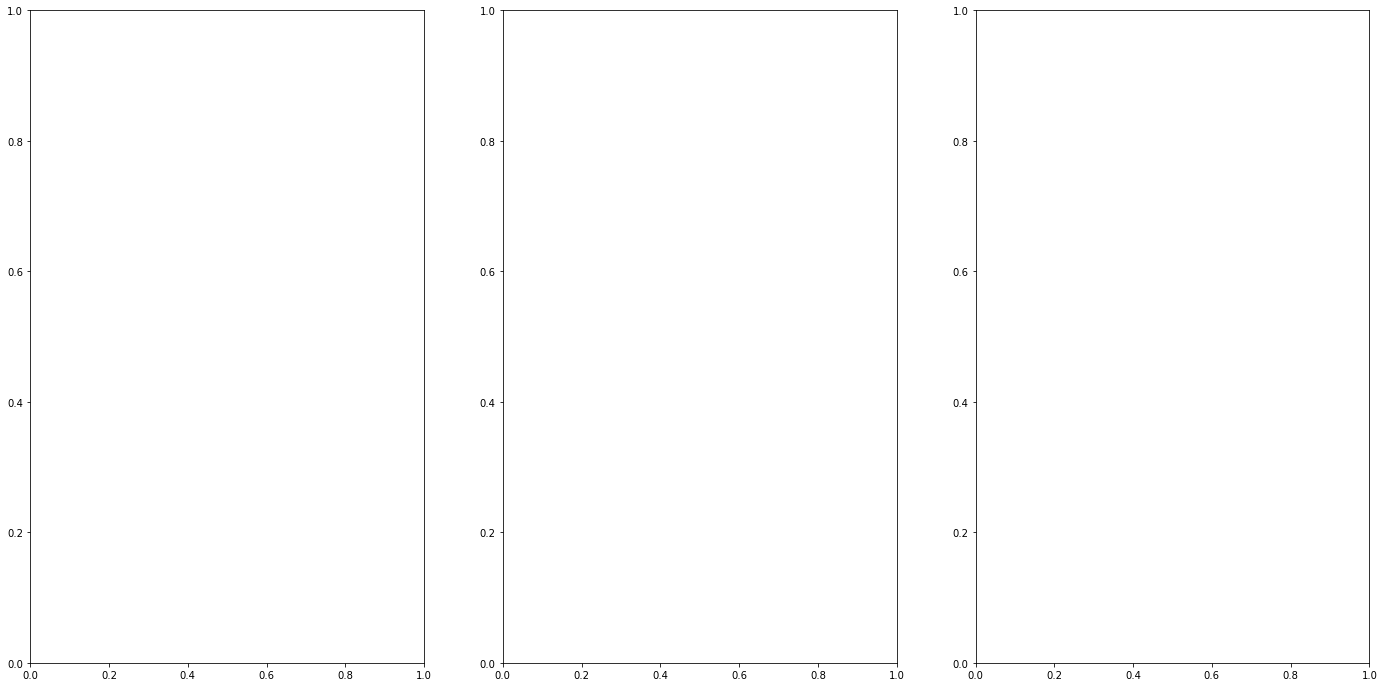

In [78]:
import matplotlib.pyplot as plt
import seaborn as sb
f, axes = plt.subplots(1, 3, figsize=(24, 12))
sb.boxplot(data = df['CPM'], orient = "h", ax = axes[0])
sb.histplot(data = df['CPM'], ax = axes[1])
sb.violinplot(data = df['CPM'], orient = "h", ax = axes[2])

<AxesSubplot:>

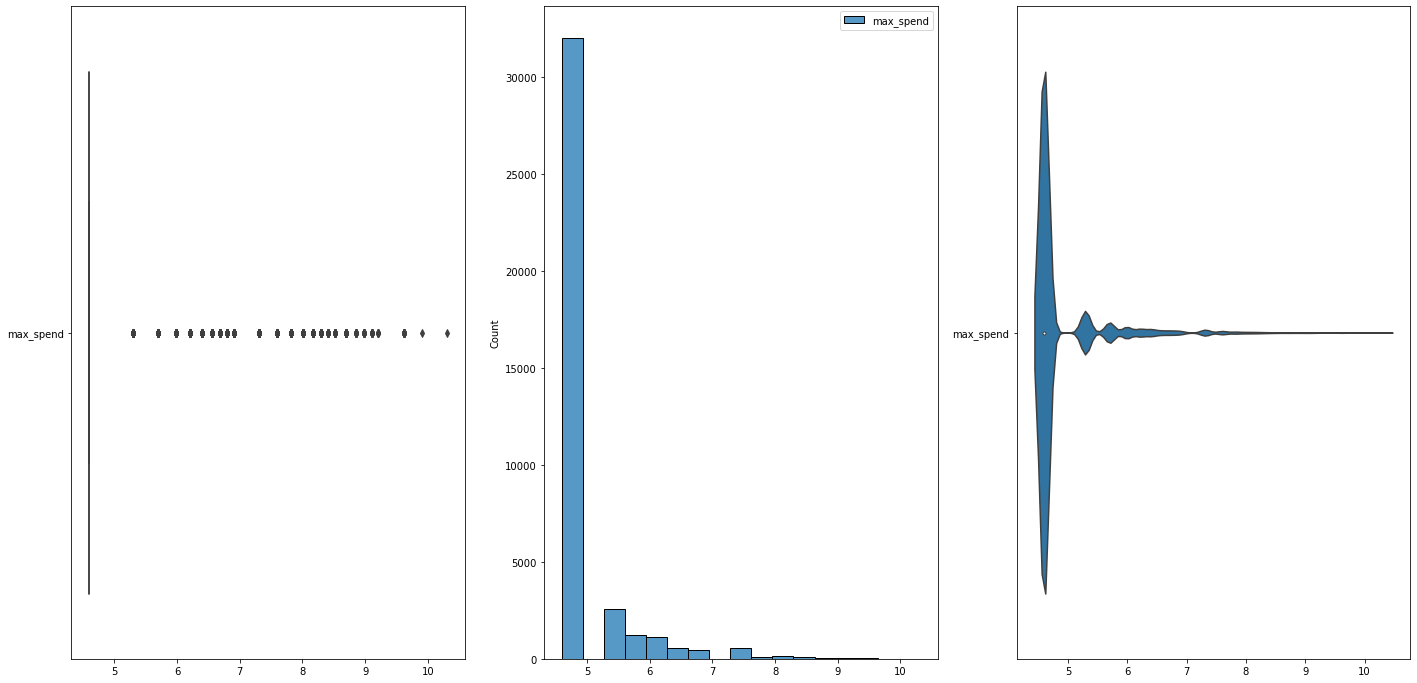

In [64]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))
sb.boxplot(data = max_spend, orient = "h", ax = axes[0])
sb.histplot(data = max_spend, ax = axes[1])
sb.violinplot(data = max_spend, orient = "h", ax = axes[2])

<AxesSubplot:>

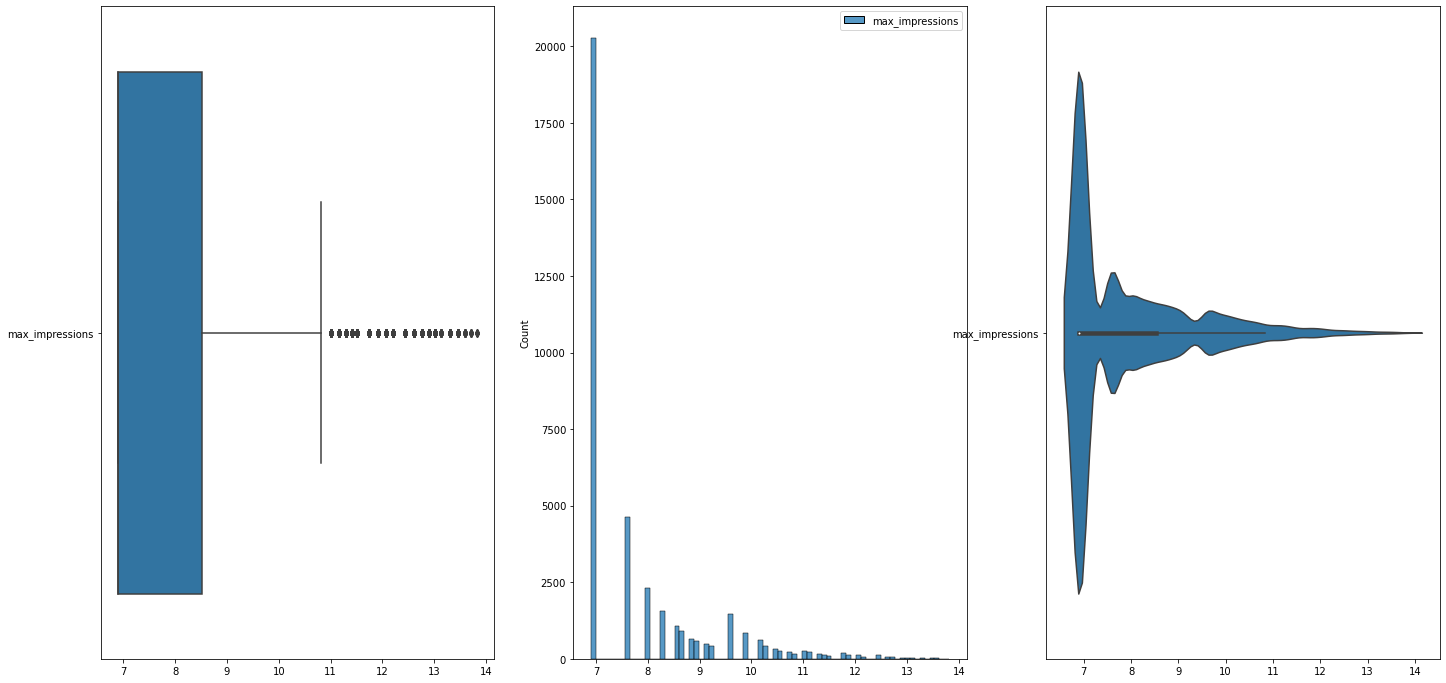

In [69]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))
sb.boxplot(data = max_impressions, orient = "h", ax = axes[0])
sb.histplot(data = max_impressions, ax = axes[1])
sb.violinplot(data = max_impressions, orient = "h", ax = axes[2])

In [70]:
max_impressions

,max_impressions
0,8.006034
1,6.906755
2,7.600402
3,7.600402
4,9.615739
...,...
38980,8.006034
38981,11.156236
38982,6.906755
38983,9.210240


In [65]:
# f, axes = plt.subplots(1, 3, figsize=(24, 12))
# sb.boxplot(data = min_spend, orient = "h", ax = axes[0])
# sb.histplot(data = min_spend, ax = axes[1])
# sb.violinplot(data = min_spend, orient = "h", ax = axes[2])

## Modelling

In [67]:
import matplotlib.pyplot as plt
import seaborn as sb

predictor=['max_impressions']
target=['CPM']

X = max_impressions
y = CPM

DF = pd.concat([y, X], axis = 1).reindex(y.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(DF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

sb.pairplot(data = DF)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('SHAPE')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

print()
print("REPORT")
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

NameError: name 'max_impression' is not defined